In [37]:
# Extract one month of variables from OCO-2 dataset

In [38]:
# to display plots in notebook
%matplotlib inline
%config InlineBackend.figure_format = "retina"

from matplotlib import rcParams
rcParams["savefig.dpi"] = 300  # high res plots
rcParams["font.size"] = 8

import warnings
warnings.filterwarnings('ignore')

In [39]:
# import necessary packages
import matplotlib.pyplot as plt # plots
import cartopy.crs as ccrs      # map projections
import pandas as pd             # large arrays
import numpy as np              # large arrays and matrices
import xarray as xr             # major tool to work with NetCDF data!
import re
# custom color map downloaded from GEOS-Chem python tutorial
from gamap_colormap import WhGrYlRd  # import the "WhGrYlRd" variable

In [40]:
# change following number
# and it will extract the corresponding month of satellite data from OCO2 measurements
year = 2016
month = 6

# names of variables need to extract 
var_names  = ['xco2', 
              'psurf', 
              'xco2_averaging_kernel',
              'co2_profile_apriori',
              'pressure_weight',
              'xco2_uncertainty',
              'operation_mode']

In [41]:
# first and last day of extraction

if(month < 10):
    first_day = str(year) + '-0' + str(month) + '-01'
    last_day_p1 = str(year) + '-0' + str(month+1) + '-01' # last day plus 1
    # ourput file name
    output_file ='/geos/u73/msadiq/satellite/oco-2/OCO2_extract_' + str(year) + '0' + str(month) + '.nc'

elif(month == 12):
    first_day = str(year) + '-' + str(month) + '-01'
    last_day_p1 = str(year+1) + '-01-01' # last day plus 1
    # ourput file name
    output_file ='/geos/u73/msadiq/satellite/oco-2/OCO2_extract_' + str(year) + str(month) + '.nc'

else:
    first_day = str(year) + '-' + str(month) + '-01'
    last_day_p1 = str(year) + '-' + str(month+1) + '-01' # last day plus 1
    # ourput file name
    output_file ='/geos/u73/msadiq/satellite/oco-2/OCO2_extract_' + str(year) + str(month) + '.nc'

# file names and paths
input_file = '/geos/u73/msadiq/satellite/oco-2/OCO2_b91_10sec_GOOD_r24.nc4'

In [42]:
ds = xr.open_dataset(input_file, engine='netcdf4')
sigma_levels = ds['sigma_levels'] #['xco2_averaging_kernel'].name
ds

<xarray.Dataset>
Dimensions:                       (epoch_dimension: 7, levels: 20, sounding_id: 1319634)
Coordinates:
  * sounding_id                   (sounding_id) int64 20140906020721 ... 20190731225946
Dimensions without coordinates: epoch_dimension, levels
Data variables:
    test_flag                     (sounding_id) int8 ...
    latitude                      (sounding_id) float32 ...
    longitude                     (sounding_id) float32 ...
    data_type                     (sounding_id) int8 ...
    date                          (sounding_id, epoch_dimension) int16 ...
    time                          (sounding_id) datetime64[ns] ...
    solar_zenith_angle            (sounding_id) float32 ...
    solar_azimuth_angle           (sounding_id) float32 ...
    sensor_zenith_angle           (sounding_id) float32 ...
    sensor_azimuth_angle          (sounding_id) float32 ...
    psurf_apriori_b8              (sounding_id) float32 ...
    psurf_apriori_o2a             (sounding_id) float32 ...
    psurf_apriori_wco2            (sounding_id) float32 ...
    psurf_apriori_sco2            (sounding_id) float32 ...
    psurf_apriori                 (sounding_id) float32 ...
    psurf                         (sounding_id) float32 ...
    xco2_raw                      (sounding_id) float32 ...
    xco2_apriori                  (sounding_id) float32 ...
    xco2                          (sounding_id) float32 ...
    xco2_uncertainty              (sounding_id) float32 ...
    model_error                   (sounding_id) float32 ...
    co2_profile_apriori           (sounding_id, levels) float32 ...
    xco2_averaging_kernel         (sounding_id, levels) float32 ...
    pressure_weight               (sounding_id, levels) float32 ...
    sigma_levels                  (levels) float32 ...
    xco2_quality_flag             (sounding_id) int8 ...
    warn_level                    (sounding_id) int8 ...
    land_fraction                 (sounding_id) int8 ...
    altitude                      (sounding_id) float32 ...
    airmass                       (sounding_id) float32 ...
    path                          (sounding_id) int16 ...
    operation_mode                (sounding_id) int8 ...
    land_water_indicator          (sounding_id) int8 ...
    surface_type                  (sounding_id) int8 ...
    fs                            (sounding_id) float32 ...
    delta_windspeed               (sounding_id) float32 ...
    s31                           (sounding_id) float32 ...
    s32                           (sounding_id) float32 ...
    albedo_3                      (sounding_id) float32 ...
    albedo_slope_3                (sounding_id) float32 ...
    aod_total                     (sounding_id) float32 ...
    albedo_2                      (sounding_id) float32 ...
    co2_grad_del                  (sounding_id) float32 ...
    dws                           (sounding_id) float32 ...
    dpfrac                        (sounding_id) float32 ...
    dp_o2a                        (sounding_id) float32 ...
    dp                            (sounding_id) float32 ...
    dp_abp                        (sounding_id) float32 ...
    co2_ratio                     (sounding_id) float32 ...
    h2o_ratio                     (sounding_id) float32 ...
    xco2_weak_idp                 (sounding_id) float32 ...
    xco2_strong_idp               (sounding_id) float32 ...
    tcwv_apriori                  (sounding_id) float32 ...
    tcwv                          (sounding_id) float32 ...
    ice_height                    (sounding_id) float32 ...
    h2o_scale                     (sounding_id) float32 ...
    deltaT                        (sounding_id) float32 ...
    snr_o2a                       (sounding_id) float32 ...
    snr_wco2                      (sounding_id) float32 ...
    snr_sco2                      (sounding_id) float32 ...
    altitude_stddev               (sounding_id) float32 ...
    N_total_shots                 (sounding_id

In [43]:
# convert time input to match the format of sound_id
first_day_digital = re.sub("[^0-9]", "", first_day)
last_day_p1_digital = re.sub("[^0-9]", "", last_day_p1)
begin = int(first_day_digital + '000000')  # begin and end of time slice we want to look at
end = int(last_day_p1_digital + '000000')  # OCO-2 format
print('begining sound id of extraction: ' + str(begin))
print('end: ' + str(end))

begining sound id of extraction: 20160601000000
end: 20160701000000


In [44]:
# get a slice of data within begin and end time
ds_slice = ds.sel(sounding_id=slice(begin,end)) # xarray Dataset

In [45]:
lon_series = ds_slice['longitude']              # lon and lat position, 1d
lat_series = ds_slice['latitude']
sound_id   = ds_slice['sounding_id']            # sound id, 1d
sigma      = ds['sigma_levels']                 # sigma levels, 20 values
# xarray dataarray

In [46]:
# position dataframe, used in for loops to locate
df_position = pd.DataFrame({'sound_id': sound_id, 
                            'lon': lon_series, 
                            'lat': lat_series})
len(df_position) #.head()

26275

In [47]:
# Creat target dataarray and dataset
lat_res = 2    # horizontal resolution of lat and lon you would want
lon_res = 2.5
lat = np.linspace(-90, 90, int(180/lat_res + 1)) # grid
lon = np.linspace(-180, 177.5, int(360/lon_res))
levels = ds_slice.sigma_levels.values

day_1   = np.array(first_day,dtype='datetime64[D]')
day_end = np.array(last_day_p1,dtype='datetime64[D]')
days    = np.arange(day_1, day_end, dtype='datetime64[D]') # time dimension of output

var_3d = xr.DataArray(data = 0, 
                      dims = ('date', 'lat', 'lon'), 
                      coords = {'date': days,
                                'lat': lat,
                                'lon': lon},
                      name = '')
var_3d = var_3d.astype(dtype='float32')

var_4d = xr.DataArray(data = 0, 
                      dims = ('date', 'lev', 'lat', 'lon'), # same as model order
                      coords = {'date': days,
                                'lev': levels,
                                'lat': lat,
                                'lon': lon},
                      name = 'xco2_averaging_kernel')

var_4d = var_4d.astype(dtype='float32')
oco2 = var_4d.to_dataset() # initialise a dataset to store all dataarrays

In [48]:
for ivar in var_names:
    nm_dim = len(ds[ivar].dims)
    if(nm_dim == 1):
        oco2[ivar] = var_3d.copy(deep=True)
    else:
        oco2[ivar] = var_4d.copy(deep=True)
oco2

<xarray.Dataset>
Dimensions:                (date: 30, lat: 91, lev: 20, lon: 144)
Coordinates:
  * date                   (date) datetime64[ns] 2016-06-01 ... 2016-06-30
  * lev                    (lev) float32 1e-04 0.05263158 ... 0.94736844 1.0
  * lat                    (lat) float64 -90.0 -88.0 -86.0 ... 86.0 88.0 90.0
  * lon                    (lon) float64 -180.0 -177.5 -175.0 ... 175.0 177.5
Data variables:
    xco2_averaging_kernel  (date, lev, lat, lon) float32 0.0 0.0 0.0 ... 0.0 0.0
    xco2                   (date, lat, lon) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
    psurf                  (date, lat, lon) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
    co2_profile_apriori    (date, lev, lat, lon) float32 0.0 0.0 0.0 ... 0.0 0.0
    pressure_weight        (date, lev, lat, lon) float32 0.0 0.0 0.0 ... 0.0 0.0
    xco2_uncertainty       (date, lat, lon) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
    operation_mode         (date, lat, lon) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0

In [49]:
# map 1d or 2d arrays to target grid and store in dataset
    
for iday in np.arange(len(days)-1):
    day1=re.sub("[^0-9]", "", str(days[iday]))
    day2=re.sub("[^0-9]", "", str(days[iday+1]))
    begin = int(str(day1) + '000000')  # begin and end of time slice we want to look at
    end = int(str(day2) + '000000')  # OCO-2 format
    
    # get a slice of position data within a day
    df_time_slice = df_position[df_position['sound_id'].between(begin, end)]
        
    for ilat in np.arange(len(lat)-1):
        # get a slice of position data within a degree of latitude band
        df_slice_lat = df_time_slice[df_time_slice['lat'].between(lat[ilat]-0.5*lat_res,lat[ilat]+0.5*lat_res, inclusive = True)]
            
        for ilon in np.arange(len(lon)-1):
            # get a slice of position data within a degree of longitude band, i.e. a grid cell in one day
            df_slice_lon = df_slice_lat[df_slice_lat['lon'].between(lon[ilon]-0.5*lon_res,lon[ilon]+0.5*lon_res, inclusive = True)]
            
            if len(df_slice_lon) != 0: # check if zero
                sound_slice = df_slice_lon.sound_id.values # localtion of points, in sound id                
                ds_slice = ds.sel(sounding_id=sound_slice)
                
                for ivar in var_names:
                    var_slice = ds_slice[ivar]
                    if(len(var_slice.dims) == 1):
                        oco2[ivar][iday,ilat,ilon] = var_slice.mean().values
                    else:
                        oco2[ivar][iday,:,ilat,ilon] = var_slice.mean(dim='sounding_id').values
                        
    print(days[iday])

2016-06-01
2016-06-02
2016-06-03
2016-06-04
2016-06-05
2016-06-06
2016-06-07
2016-06-08
2016-06-09
2016-06-10
2016-06-11
2016-06-12
2016-06-13
2016-06-14
2016-06-15
2016-06-16
2016-06-17
2016-06-18
2016-06-19
2016-06-20
2016-06-21
2016-06-22
2016-06-23
2016-06-24
2016-06-25
2016-06-26
2016-06-27
2016-06-28
2016-06-29


In [50]:
oco2['operation_mode'].isel(date=0).sum()

<xarray.DataArray 'operation_mode' ()>
array(293., dtype=float32)
Coordinates:
    date     datetime64[ns] 2016-06-01

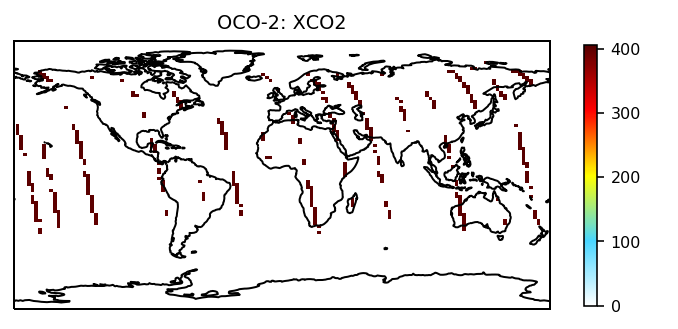

In [51]:
# plot after mapping
fig = plt.figure(figsize=[6, 6])
proj=ccrs.PlateCarree()

ax = plt.subplot(111, projection=proj)
ax.coastlines()
tmp = oco2['psurf'] - oco2['xco2']
#oco2['operation_mode'].
oco2['xco2'].isel(date=0).plot(ax=ax, transform=ccrs.PlateCarree(), cmap=WhGrYlRd, cbar_kwargs={'shrink': 0.4, 'label': ' '})

ax.set_title('OCO-2: XCO2');

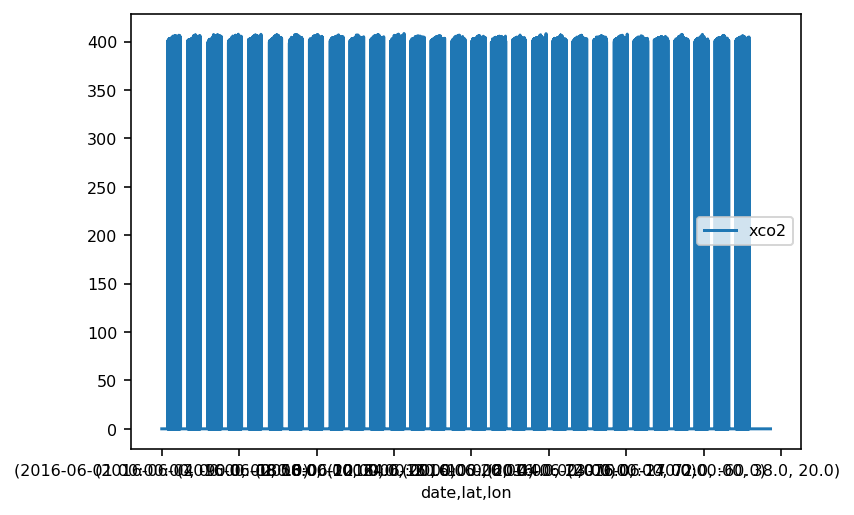

In [52]:
tmp = oco2.xco2.to_dataframe()
len(tmp)
tmp.plot()

In [53]:
oco2.to_netcdf(output_file)

In [54]:
# Next:
# flatten 3d or 4d (lat, lon, date, level) OCO2 data to 1d or 2d (record, level)